# Comparing the Chi Squared values

## Import modules

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import sncosmo
from bayesn import SEDmodel
import matplotlib.patches as mpatches
import os
import pandas as pd
import pickle

## Make a list of all SNe

In [2]:
directory = os.fsencode("/root/partiiiproject/Archive")
supernovae_names = ["sn2006hb"]
for file in os.listdir(directory):
    filename = os.fsdecode(file)
    if filename.endswith(".dat"):
        supernovae_names.append(filename[:-4])
        continue
    else:
        continue

## Define dust laws

In [3]:
dust_laws = ('F99', 'F19', 'G23')

## Load data frame with ChiSquared values

In [4]:
dfsim = pd.read_csv("ChiSquaredFinalsim.csv")
dfsim = dfsim.drop(['Unnamed: 0'], axis=1)
dfsim.index = supernovae_names
dffit = pd.read_csv("ChiSquaredFinalfit.csv")
dffit = dffit.drop(['Unnamed: 0'], axis=1)
dffit.index = supernovae_names

## Plot bar charts

sn2006hb    G23
sn2006hb    G23
sn2008fl    F99
sn2007jg    G23
sn2008R     F19
           ... 
sn2007hj    G23
sn2005ki    F99
sn2007bc    G23
sn2005iq    G23
sn2008bq    F99
Length: 91, dtype: object


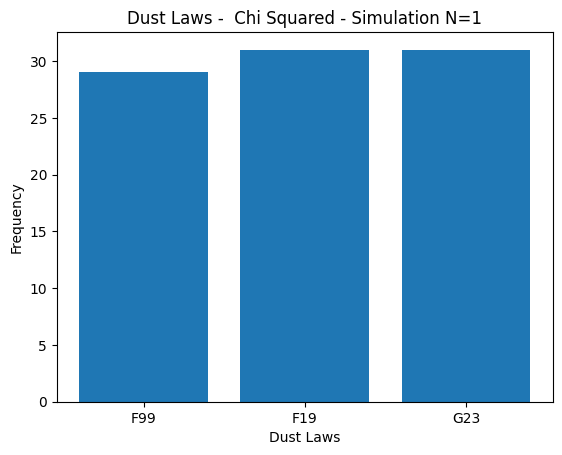

sn2006hb    G23
sn2006hb    G23
sn2008fl    F99
sn2007jg    F19
sn2008R     G23
           ... 
sn2007hj    G23
sn2005ki    F19
sn2007bc    F99
sn2005iq    G23
sn2008bq    G23
Length: 91, dtype: object


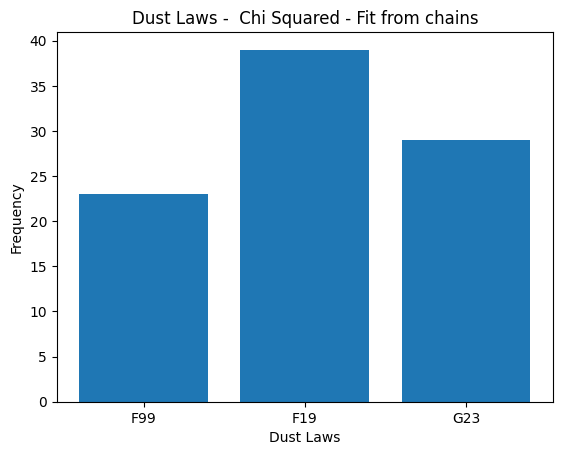

In [5]:
#sim
maxdfsim = dfsim.idxmin(axis = 1)
print(maxdfsim)
frequency =  np.zeros(len(dust_laws))
for j in range(len(dust_laws)):
    frequency[j] = (maxdfsim == dust_laws[j]).sum()
plt.bar(dust_laws, frequency)
plt.title('Dust Laws -  Chi Squared - Simulation N=1')
plt.xlabel('Dust Laws')
plt.ylabel('Frequency')
plt.savefig("/root/partiiiproject/DustLawsGeneralGraphs/ChiSquaredBestDustLawsimFinal.png", bbox_inches='tight') 
plt.show()

#fit
maxdffit = dffit.idxmin(axis = 1)
print(maxdffit)
frequency =  np.zeros(len(dust_laws))
for j in range(len(dust_laws)):
    frequency[j] = (maxdffit == dust_laws[j]).sum()
plt.bar(dust_laws, frequency)
plt.title('Dust Laws -  Chi Squared - Fit from chains')
plt.xlabel('Dust Laws')
plt.ylabel('Frequency')
plt.savefig("/root/partiiiproject/DustLawsGeneralGraphs/ChiSquaredBestDustLawfitFinal.png", bbox_inches='tight') 
plt.show()

## Plot as relative to F99

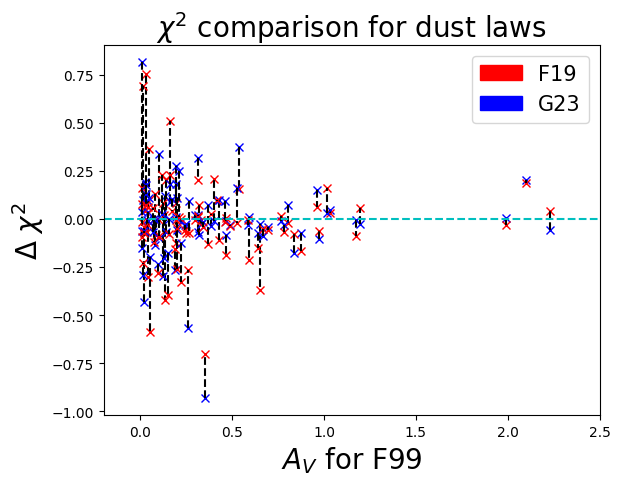

In [6]:
for method in ["fit"]:
    if method == "sim":
        df = dfsim
    else:
        df = dffit
    
    for supernova_name in supernovae_names:
        if supernova_name in ["sn2006hb", "sn2014J", "sn2002cv", "sn2006X"]:
            continue
            
        supernova_file = "/root/partiiiproject/Archive/"+supernova_name+".dat"
        meta, lcdata = sncosmo.read_snana_ascii(supernova_file, default_tablename='OBS')
        z = meta['REDSHIFT_FINAL']
        
        dust_law = "F99"
        sampleSummaryDir = "DustLawsFitOfAllSamples/"+supernova_name + dust_law + "_fit_summary.csv"
        try:
            samplesSummary = pd.read_csv(sampleSummaryDir)
            samplesSummary = samplesSummary.rename(index=samplesSummary['Unnamed: 0'])
            AV1 = samplesSummary.loc['AV[0]', 'mean']
            chi1 = df.at[supernova_name, dust_law]
        except FileNotFoundError:
            continue
        
        dust_law = "G23"
        chi2 = df.at[supernova_name, dust_law]
        plt.plot(AV1, chi2-chi1, f'bx', label=dust_law)
        
    
        dust_law = "F19"
        chi3 = df.at[supernova_name, dust_law]
        plt.plot(AV1, chi3-chi1, f'rx', label=dust_law)
        
        plt.plot([AV1, AV1], [chi2-chi1, chi3-chi1], 'k--')
        
    plt.plot([-0.2,8], [0,0], 'c--')
    plt.xlabel(f'$A_V$ for F99', fontsize = 20)
    plt.ylabel(f"$\Delta$ $\\chi^2$", fontsize = 20)
    plt.title(f"$\\chi^2$ comparison for dust laws", fontsize = 20)
    
    red_patch = mpatches.Patch(color='red', label='F19')
    blue_patch = mpatches.Patch(color='blue', label='G23')
    plt.legend(handles=[red_patch, blue_patch], fontsize = 15)
    plt.xlim(-0.2,2.5)
    #plt.yscale("log")
    plt.savefig("/root/partiiiproject/DustLawsGeneralGraphs/ChiSquaredPercentageFinal"+method+".png", bbox_inches='tight') 
    plt.show()

## Comparing the fit and the simulation method

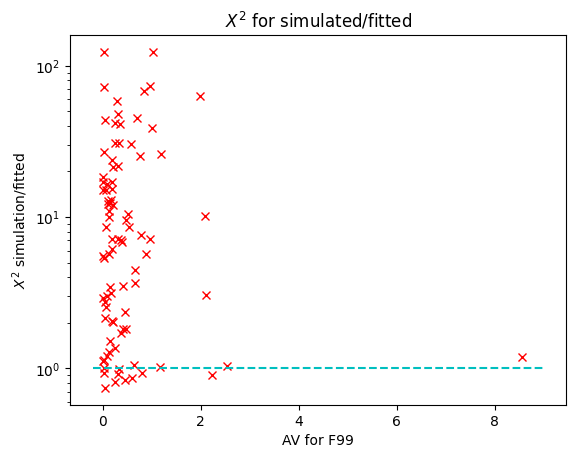

In [7]:
for supernova_name in supernovae_names:
    if supernova_name == "sn2006hb":
        continue
        
    supernova_file = "/root/partiiiproject/Archive/"+supernova_name+".dat"
    meta, lcdata = sncosmo.read_snana_ascii(supernova_file, default_tablename='OBS')
    z = meta['REDSHIFT_FINAL']
    
    dust_law = "F99"
    sampleSummaryDir = "DustLawsFitOfAllSamples/"+supernova_name + dust_law + "_fit_summary.csv"
    try:
        samplesSummary = pd.read_csv(sampleSummaryDir)
        samplesSummary = samplesSummary.rename(index=samplesSummary['Unnamed: 0'])
        AV1 = samplesSummary.loc['AV[0]', 'mean']
        chi_sim = dfsim.at[supernova_name, dust_law]
        chi_fit = dffit.at[supernova_name, dust_law]
    except FileNotFoundError:
        continue
    
    
    plt.plot(AV1, chi_sim/chi_fit, f'rx')
    
plt.plot([-0.2,9], [1,1], 'c--')
plt.yscale("log")
plt.xlabel('AV for F99')
plt.title(f"$X^2$ for simulated/fitted")
plt.ylabel(f"$X^2$ simulation/fitted")
plt.savefig("/root/partiiiproject/DustLawsGeneralGraphs/chisquaredsimvsfit"+".png", bbox_inches='tight') 
plt.show()

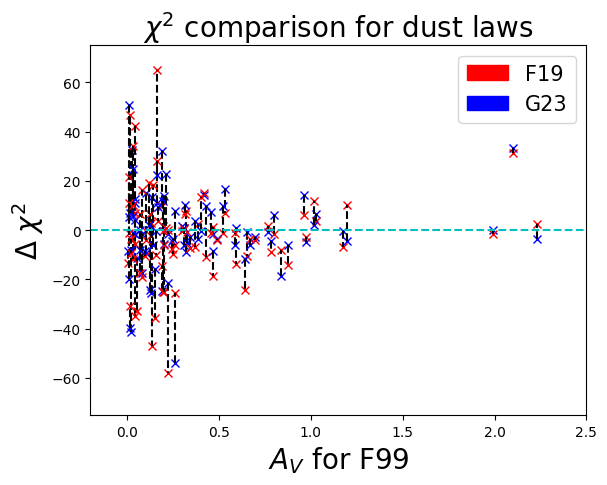

In [11]:
df = pd.read_csv("ChiSquaredFinalNotNormalfit.csv")
df = df.drop(['Unnamed: 0'], axis=1)
df.index = supernovae_names

for method in ["fit"]:
    
    for supernova_name in supernovae_names:
        if supernova_name in ["sn2006hb", "sn2014J", "sn2002cv", "sn2006X"]:
            continue
            
        supernova_file = "/root/partiiiproject/Archive/"+supernova_name+".dat"
        meta, lcdata = sncosmo.read_snana_ascii(supernova_file, default_tablename='OBS')
        z = meta['REDSHIFT_FINAL']
        
        dust_law = "F99"
        sampleSummaryDir = "DustLawsFitOfAllSamples/"+supernova_name + dust_law + "_fit_summary.csv"
        try:
            samplesSummary = pd.read_csv(sampleSummaryDir)
            samplesSummary = samplesSummary.rename(index=samplesSummary['Unnamed: 0'])
            AV1 = samplesSummary.loc['AV[0]', 'mean']
            chi1 = df.at[supernova_name, dust_law]
        except FileNotFoundError:
            continue
        
        dust_law = "G23"
        chi2 = df.at[supernova_name, dust_law]
        plt.plot(AV1, chi2-chi1, f'bx', label=dust_law)
        
    
        dust_law = "F19"
        chi3 = df.at[supernova_name, dust_law]
        plt.plot(AV1, chi3-chi1, f'rx', label=dust_law)
        
        plt.plot([AV1, AV1], [chi2-chi1, chi3-chi1], 'k--')
        
    plt.plot([-0.2,8], [0,0], 'c--')
    plt.xlabel(f'$A_V$ for F99', fontsize = 20)
    plt.ylabel(f"$\Delta$ $\\chi^2$", fontsize = 20)
    plt.title(f"$\\chi^2$ comparison for dust laws", fontsize = 20)
    
    red_patch = mpatches.Patch(color='red', label='F19')
    blue_patch = mpatches.Patch(color='blue', label='G23')
    plt.legend(handles=[red_patch, blue_patch], fontsize = 15)
    plt.xlim(-0.2,2.5)
    plt.ylim(-75,75)
    #plt.yscale("log")
    plt.savefig("/root/partiiiproject/DustLawsGeneralGraphs/ChiSquaredPercentageFinalNotNormal"+method+".png", bbox_inches='tight') 
    plt.show()